## Part 3: Advanced Text Processing - LDA and BERTopic Topic Modeling

**Resources:**
- LDA:
    - https://medium.com/sayahfares19/text-analysis-topic-modelling-with-spacy-gensim-4cd92ef06e06 
    - https://www.kaggle.com/code/faressayah/text-analysis-topic-modeling-with-spacy-gensim#%F0%9F%93%9A-Topic-Modeling (code for previous post)
    - https://towardsdatascience.com/topic-modelling-in-python-with-spacy-and-gensim-dc8f7748bdbf/ 
- BERTopic:
    - https://maartengr.github.io/BERTopic/getting_started/visualization/visualize_documents.html#visualize-documents-with-plotly 
    - https://maartengr.github.io/BERTopic/getting_started/visualization/visualize_topics.html 


In [16]:
from spacy import displacy
from bertopic import BERTopic
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis
import pyLDAvis.gensim_models
import spacy

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### LDA
In this section, we will be training an LDA model with 18 different topics. After training the model, we will outout the top 10 words for each topic. Furthermore, we will also output the topic distribution for the first speech in our dataset, and make a visualization with our corpus and dictionary.

We will be using the next two cells to process the data.

In [17]:
sou = pd.read_csv('data/SOTU.csv')
nlp = spacy.load("en_core_web_sm")

In [18]:
def preprocess_text(text): 
    doc = nlp(text) 
    return [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space and len(token.lemma_) > 3]

In [19]:
# Process all texts - note this takes ~ 5 minutes to run
processed_docs = sou['Text'].apply(preprocess_text)

To train an LDA model, we will use the LdaModel function that we imported a couple of cells back. I used the last resource linked in the LDA section, since it was especially useful for walking through the steps below. We will also set the `random_state` parameter to 42 to ensure reproducibility and determinism. Further, the last resource provided uses `LdaMulticore`, which is essentially a parallelizable version of our function `LdaModel`. We used `LdaModel` instead, ignoring the `iterations` and `workers` arguments that were used in the guide.

In [31]:
# Build dictionary from processed_docs, which is a list of tokens extracted from our speeches
dictionary = Dictionary(processed_docs)
# filtering words with too low and too high of a frequency
dictionary.filter_extremes(no_below = 2, no_above = 0.5, keep_n = 1000)
# Creating our bag of words
corpus = [dictionary.doc2bow(doc) for doc in processed_docs] 

In [32]:
# train LDA model with 18 topics
lda_model = LdaModel(corpus = corpus, id2word = dictionary, num_topics = 18, random_state = 42, passes = 10)

In [47]:
lda_model.print_topics(-1)

[(0,
  '0.010*"island" + 0.005*"mexico" + 0.004*"convention" + 0.004*"canal" + 0.004*"spain" + 0.004*"port" + 0.004*"chinese" + 0.004*"article" + 0.003*"admit" + 0.003*"corporation"'),
 (1,
  '0.011*"method" + 0.010*"board" + 0.009*"agricultural" + 0.009*"cent" + 0.008*"farmer" + 0.008*"project" + 0.008*"tariff" + 0.007*"committee" + 0.007*"loan" + 0.007*"conference"'),
 (2,
  '0.028*"americans" + 0.022*"tonight" + 0.012*"today" + 0.011*"thank" + 0.011*"budget" + 0.010*"percent" + 0.010*"program" + 0.009*"challenge" + 0.009*"worker" + 0.009*"hard"'),
 (3,
  '0.010*"cent" + 0.009*"june" + 0.008*"indian" + 0.007*"pension" + 0.006*"method" + 0.006*"indians" + 0.005*"mail" + 0.005*"postal" + 0.005*"amount" + 0.005*"bond"'),
 (4,
  '0.007*"gold" + 0.005*"note" + 0.004*"wrong" + 0.004*"currency" + 0.004*"bond" + 0.003*"island" + 0.003*"reserve" + 0.003*"convention" + 0.003*"spain" + 0.003*"americans"'),
 (5,
  '0.007*"americans" + 0.006*"program" + 0.006*"tonight" + 0.005*"today" + 0.003*"bi

In [51]:
# print the topic distribution for the first speech
first_speech = corpus[0]
topic_dist = lda_model.get_document_topics(first_speech)
print(topic_dist)

[(2, np.float32(0.9988718))]


In [52]:
# make a visualization using pyLDAvis
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.117830  0.010328       1        1  23.833328
2      0.229748 -0.092709       2        1  15.890568
3     -0.075082  0.064171       3        1  14.289324
17     0.160870 -0.012947       4        1  12.235582
15     0.004134  0.039436       5        1  11.187290
11    -0.067706  0.057559       6        1   8.276890
1      0.013496  0.065892       7        1   4.899624
7     -0.089307  0.030292       8        1   4.070589
9     -0.092593  0.084407       9        1   3.095694
16    -0.016104 -0.020232      10        1   1.260446
14     0.036181  0.037127      11        1   0.358542
8     -0.166326 -0.258746      12        1   0.284756
10     0.094290 -0.037368      13        1   0.163500
12     0.053471  0.046169      14        1   0.125336
0     -0.015951  0.010537      15        1   0.007133
5      0.040761 -0.016575      16        1   0.007133
4      0.005637 -0.002049      17        1   0.007133
13     0.002310 -0.005292      18        1   0.007133, topic_info=          Term         Freq        Total Category  logprob  loglift
199    program  1296.000000  1296.000000  Default  30.0000  30.0000
9    americans   993.000000   993.000000  Default  29.0000  29.0000
353     mexico   845.000000   845.000000  Default  28.0000  28.0000
259    tonight   663.000000   663.000000  Default  27.0000  27.0000
258      today   577.000000   577.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
833     indian     0.029594   565.561801  Topic18  -6.1331  -0.3098
560     tariff     0.027917   524.027069  Topic18  -6.1915  -0.2918
9    americans     0.030485   993.208997  Topic18  -6.1035  -0.8432
363   railroad     0.025875   386.017258  Topic18  -6.2674  -0.0621
403     budget     0.026415   676.096639  Topic18  -6.2468  -0.6019

[944 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
899       1  0.491646   30th
899       3  0.062763   30th
899       4  0.010461   30th
899       5  0.005230   30th
899       6  0.162139   30th
...     ...       ...    ...
293       7  0.016191  young
293       8  0.003238  young
293       9  0.003238  young
293      10  0.003238  young
293      11  0.012953  young

[5269 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 3, 4, 18, 16, 12, 2, 8, 10, 17, 15, 9, 11, 13, 1, 6, 5, 14])

### BERTopic

In this section, rather than LDA, we will be training a BERTopic model. We will use a `min_topic_size` of 3. To actually fit the model, we will use the `fit_transform` method, passing in `docs` as our arguments. Like in the previous part, we will output the top 10 words for each topic, the topic distribution for the first speech, and make a visualization of the topics (see topic_model.visualize_topics())

In [62]:
docs = sou['Text'].to_list()

In [64]:
# train the model - this takes about 30 seconds
topic_model = BERTopic(min_topic_size = 3)
topics, probabilities = topic_model.fit_transform(docs)

# remove stop words from the topics (Hint: use CountVectorizer and then .update_topics on topic_model)
vec_model = CountVectorizer(stop_words = "english")
topic_model.update_topics(docs, vectorizer_model = vec_model)

In [65]:
# output the top 10 words for each topic - hint see get_topic_info
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,56,-1_states_government_united_congress,"[states, government, united, congress, war, pu...",[\nTo the Congress of the United States:\nYour...
1,0,70,0_america_new_people_world,"[america, new, people, world, years, american,...","[\nMr. Speaker, Mr. President, distinguished M..."
2,1,22,1_states_government_united_congress,"[states, government, united, congress, public,...",[\nFellow-Citizens of the Senate and of the Ho...
3,2,11,2_states_united_british_war,"[states, united, british, war, citizens, great...",[\nThe Senate and House of Representatives of ...
4,3,11,3_government_great_law_public,"[government, great, law, public, congress, wor...",[\nTo the Senate and House of Representatives:...
5,4,10,4_world_peace_nations_soviet,"[world, peace, nations, soviet, nation, econom...","[\nMr. President, Mr. Speaker, Members of the ..."
6,5,8,5_national_government_federal_public,"[national, government, federal, public, congre...",[\nMEMBERS OF THE CONGRESS:\nSo many problems ...
7,6,8,6_government_states_law_united,"[government, states, law, united, gold, congre...",[\nTo the Senate and House of Representatives:...
8,7,7,7_states_government_united_public,"[states, government, united, public, congress,...",[\nTo the Senate and House of Representatives:...
9,8,6,8_government_states_public_general,"[government, states, public, general, subject,...",[\nFellow Citizens of the Senate and of the Ho...


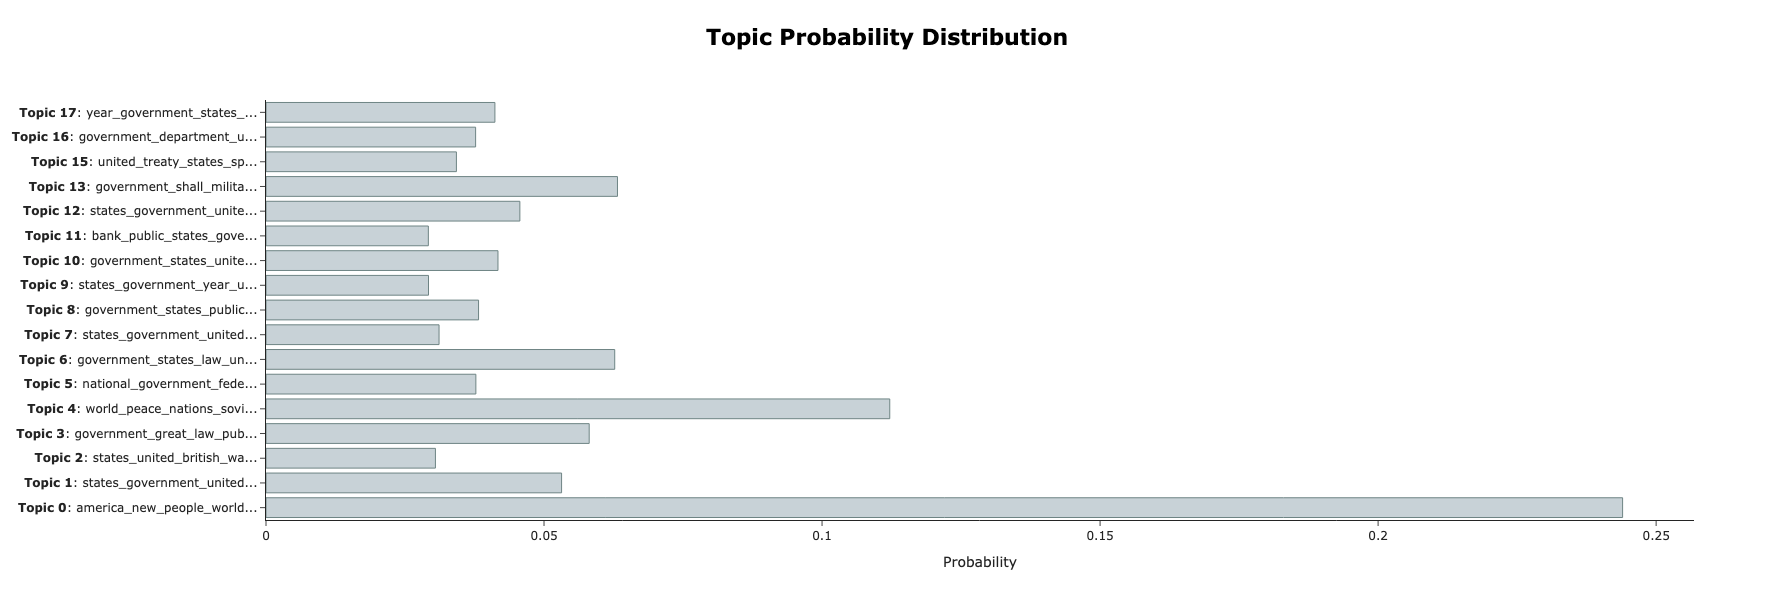

In [66]:
# output the topic distribution for the first speech
topic_distr, _ = topic_model.approximate_distribution(docs)
topic_model.visualize_distribution(topic_distr[1])

# hint: check out approximate_distribution() and visualize_distribution()

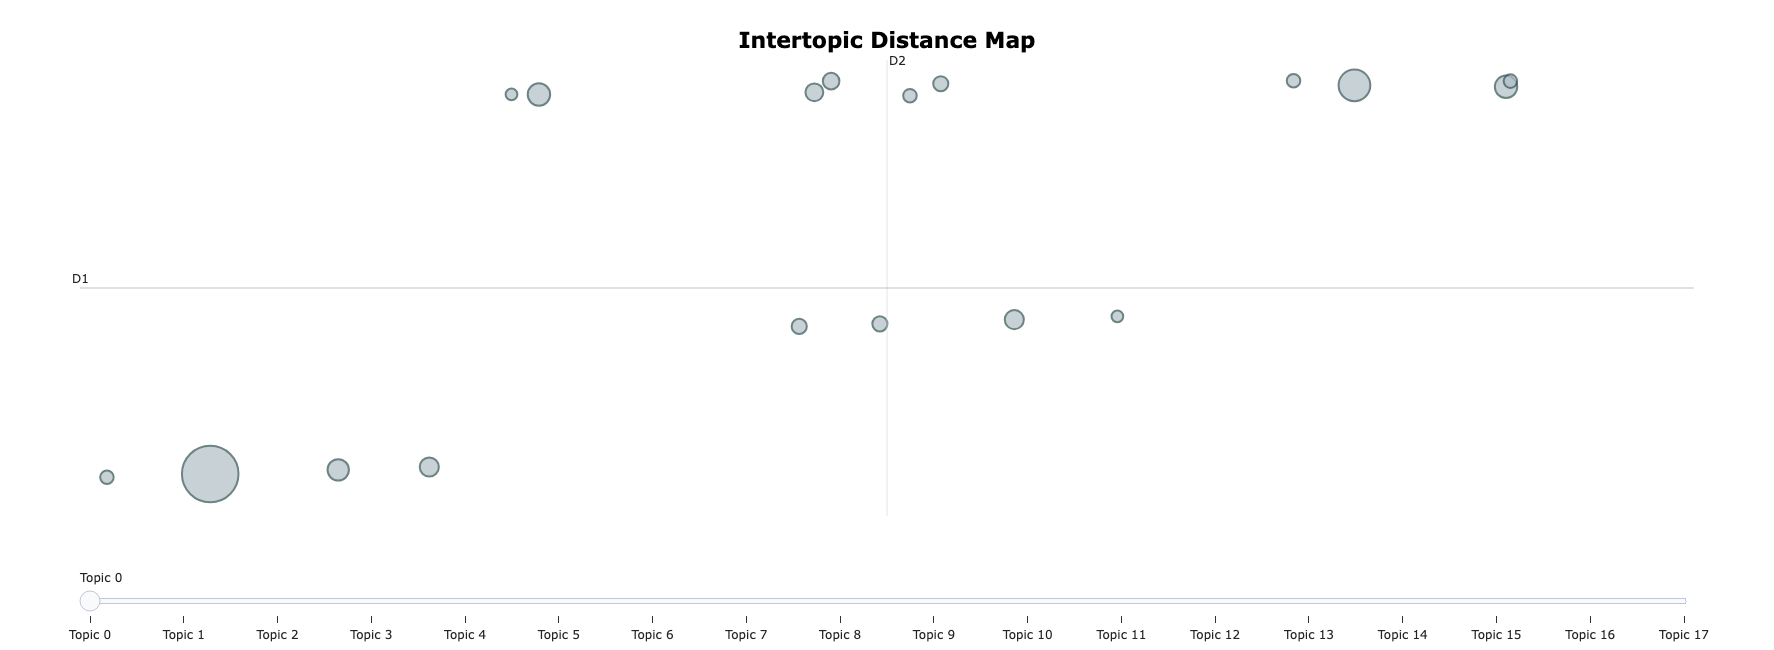

In [67]:
# run this cell to visualize the topics
topic_model.visualize_topics()